# Ford GoBike System Data

## Preliminary Wrangling

This document explores the Ford GoBike System dataset containing information about individual ride made in a bike-sharing system covering the greater San Fransisco Bay area.

In [38]:
# import all necessary packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [60]:
# load in the dataset into a pandas dataframe, assign to a variable
bikes = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
#understand the content of the data. Explore it's quality and tidyness
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
bikes.shape

(183412, 16)

In [6]:
bikes.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
bikes.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


### What is the structure of your dataset?

There are 183412 bikes in the Dataset with 16 features (duration sec, start time, end time, start station id,
       start station name, start station latitude, start station longitude, end station id, end station name,
       end station latitude, end station longitude, bike id, user type, member birth year, member gender, bike share for all trip). The content of the dataset is a combination of floats, objects and integers. Most of the variables are numeric in nature. Only start station name, end station name, user type, member gender and bike sharing for all trip are qualitative with no order.
The users are evenly categorized as either customers or subscribers. 
The member_gender column has 3 entries: Male, Other and Female.
the bike_share_for_all_trip are only with two entries: Yes or No


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the diffence in usage by subscibers as against that of customers and how age affects choice of sharing, distance and duration on the bikes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will make use of the duration sec, bike id, user type, member birth year, member gender, bike share for all trip. I anticipate that subscribers shared their bikes for all trips and spent more time. I also think the most common gender for subscibers who shared will be women. 


## Univariate Exploration

I'll begin by looking at the distribution of some of the key variables in my investigation:bike share for all trip, member gender, user type, duration sec and member birth year .

In [61]:
#first, I drop the null values to clean the dataset
#code
bikes.dropna(axis = 0, inplace = True )

In [11]:
#test
bikes.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

I'll start with the number of users who shared their bikes during the trip

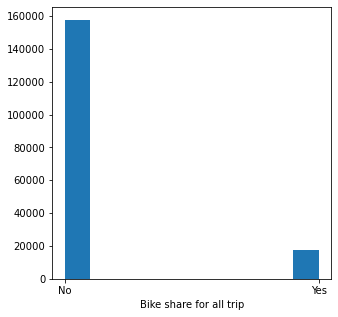

In [12]:
#plot a standard scale plot
plt.figure(figsize=[5,5])
plt.hist(data = bikes, x = 'bike_share_for_all_trip')
plt.xlabel('Bike share for all trip')
plt.show()

Starting simple. It is clear there are less users who shared their bikes for all trips than those who did not. The divergence shows that it was clearly not a popular choice by the users to share bikes generally regardless of gender, age or duration being covered.

Next, I examine the duration of use by the users

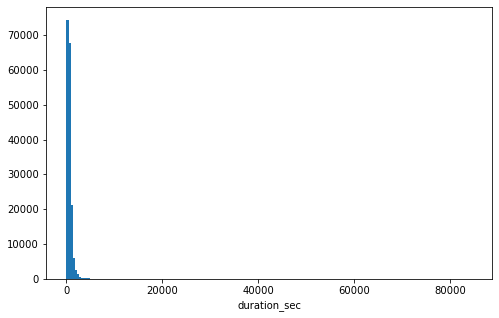

In [13]:
#plot a standard scale

binsize = 450
bins = np.arange(0, bikes['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xlabel('duration_sec')
plt.show()

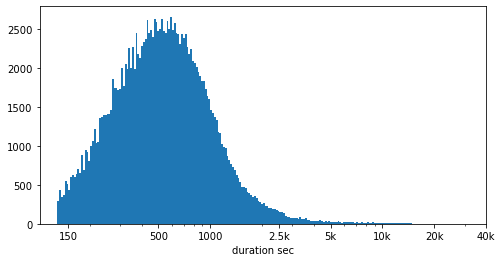

In [17]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.0125
bins = 7 ** np.arange(2.5, np.log10(bikes['duration_sec'].max()+10)+log_binsize, log_binsize)

plt.figure(figsize=[8,4])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([150, 500,1000, 2500, 5000, 10000, 20000, 40000], [150, '500', '1000', "2.5k", '5k','10k', '20k', '40k'])
plt.xlabel('duration sec')
plt.show()

There is a peak increase at around 400 - 700 seconds. Fewer users spend more than 1,000 seconds and the least duration is between 10,000 seconds to max. There seem to be no ouliers.

Next, I will examine the birth year

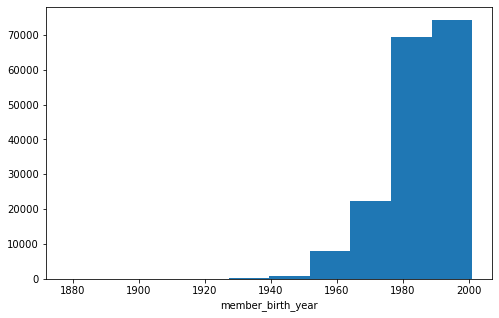

In [18]:
plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'member_birth_year')
plt.xlabel('member_birth_year')
plt.show()

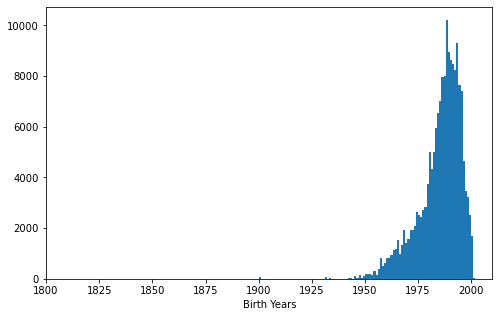

In [19]:
#investigating further with a smaller binsize
binsize = 1
bins = np.arange(1, bikes['member_birth_year'].max()+50,binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'member_birth_year', bins = bins)
plt.xlim([1800,2010])
plt.xlabel('Birth Years')
plt.show()

Here, there seems to be an outlier in this column. It is quite abnormal to have a user within the birth range of 1900. The most common age distribution seems to be from 1975 - 1995. Very few members were born after 2000 and few members are born before 1950 to 1925 which is quite expected

<AxesSubplot:xlabel='user_type', ylabel='count'>

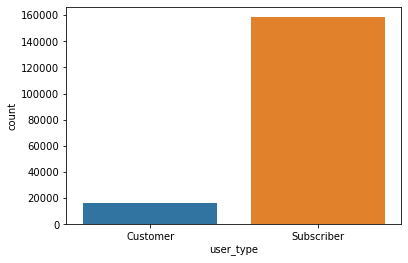

In [20]:
sb.countplot(data = bikes, x = 'user_type')

The users who are customers are clearly lesser than the subscibers. This implies that most users prefer subscribing for one reason or the other (eg. price cuts) than using as customers. The divergence here shows it is a popular option for the users. Less than 20,000 users out of 183,412 users did not subscribe. 

Next, I explore the gender distribution.

<AxesSubplot:xlabel='member_gender', ylabel='count'>

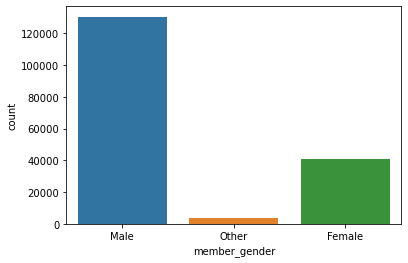

In [21]:
sb.countplot(data = bikes, x = 'member_gender')

The gender distribution is between Male, Female and others. The number of male bike users clearly out numbers the female or other gender users. There is insufficient data in the dataset to figure out why this is so. It is likely there are more men then women in the san fransisco city where the data was taken.

After this, I go further to examine the distance travelled by the users.

In [62]:
#first I assin all needed columns to a variable

start_lat = bikes["start_station_latitude"]
stat_long = bikes["start_station_longitude"]
end_long = bikes["end_station_longitude"]
end_lat = bikes["end_station_latitude"]

In [63]:
#create a function to derive the distance in KM (Using Haversine) between the start and end using the longitude and latitude provided in the dataset.

def Haversine(lat1,lon1,lat2,lon2, **kwarg):
    """
    This uses the ‘haversine’ formula to calculate the great-circle distance between two points – that is, 
    the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points 
    (ignoring any hills they fly over, of course!).
    Haversine
    formula:    a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
    c = 2 ⋅ atan2( √a, √(1−a) )
    d = R ⋅ c
    where   φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
    note that angles need to be in radians to pass to trig functions!
    """
    R = 6371.0088
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

    lat = lat2 - lat1
    lon = lon2 - lon1
    a = np.sin(lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
    return round(d,4)

In [64]:
#run the function and add as a column to the dataframe 
distance_km = Haversine(start_lat,stat_long,end_lat,end_long)
bikes.insert(0, "Distance_km", distance_km)

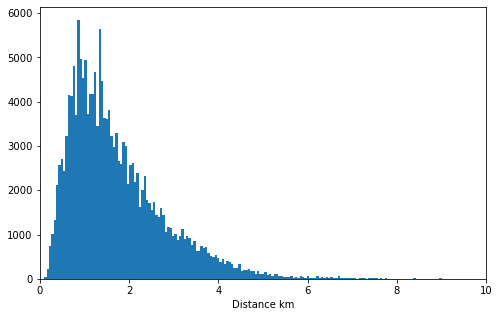

In [65]:
# plot the distance to see the distribution

binsize = 0.053
bins = np.arange(0.1, bikes['Distance_km'].max()+10, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'Distance_km', bins = bins)
plt.xlim([0,10])
plt.xlabel('Distance km')
plt.show()

The histogram shows that most users biked over 0.5 - 2km distances and very few users biked above 6km. It is likely the users who went above 8km were younger users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The member birth year and member duration came with long tails after being plotted. For the member duration I had to look at the data using a  log transform. For the birth year I made use of a small bin size.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Before my exploration, I removed all null values to clean my dataset.
I discovered outliers in the member birth year distribution. There were records with a date range around 1900. While this seems unlikely it possible, but very very unlikely to be true.

I also calculated the distance travelled to and created a column for it using the longitude and latitude information in the dataset. This allowed me to understand the distance covered by the users. In this distribution there were users who travelled more than 8KM. While this is not impossible, it felt unusual.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations between some variables of interest to further investigate the dataset.

First I will begin with the relationship between the birth year and duration. I presume younger users spend longer time than the older ones

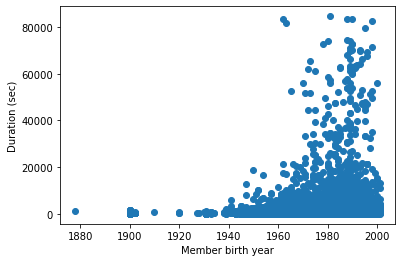

In [26]:
plt.scatter(data = bikes, x = 'member_birth_year', y = "duration_sec",);
plt.xlabel("Member birth year")
plt.ylabel("Duration (sec)");

Text(0, 0.5, 'Duration (sec)')

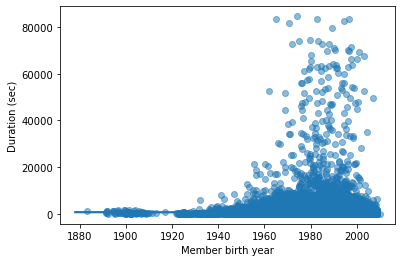

In [27]:
#a clearer exploration with seaborn 
sb.regplot(data = bikes, x = 'member_birth_year', y = "duration_sec", x_jitter = 9, scatter_kws = {"alpha" : 1/2}); 
plt.xlabel("Member birth year")
plt.ylabel("Duration (sec)")

The scatterplot goes to confirm my hypothesis. Younger users from 1980 - 2000 tend to spend more time than those who are more advanced in age.

Now, i will explore the relationship between the distance covered and how much time the users spent.

Text(0, 0.5, 'Distance (km)')

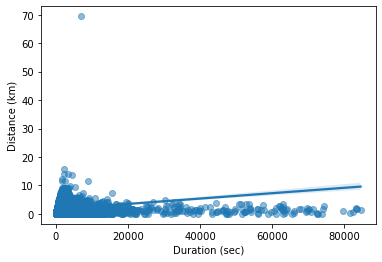

In [66]:
sb.regplot(data = bikes, x = 'duration_sec', y = "Distance_km", x_jitter = 9, scatter_kws = {"alpha" : 1/2}); 
plt.xlabel("Duration (sec)")
plt.ylabel("Distance (km)")

There is clearly an outlier here in the dataset. It is quite abnormal for a commercial bike user to cover over 70km in over 4 hours. So, I will remove that row

In [67]:
bikes[bikes.Distance_km == 69.4693]

,Distance_km,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
112038,69.4693,6945,2019-02-12 14:28:44.4020,2019-02-12 16:24:30.1580,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,-121.884995,4780,Subscriber,1985.0,Female,No


In [68]:
bikes.drop(112038, 0 , inplace = True)

C:\Users\User\anaconda3\envs\ALX3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Distance (km)')

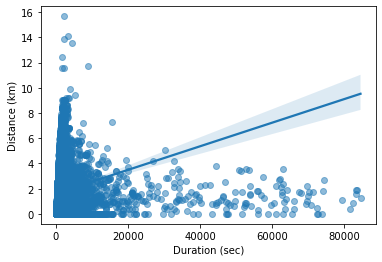

In [69]:
#re-plotting 
sb.regplot(data = bikes, x = 'duration_sec', y = "Distance_km", x_jitter = 9, scatter_kws = {"alpha" : 1/2}); 
plt.xlabel("Duration (sec)")
plt.ylabel("Distance (km)")

Next I examine the relationship between the gender and duration.

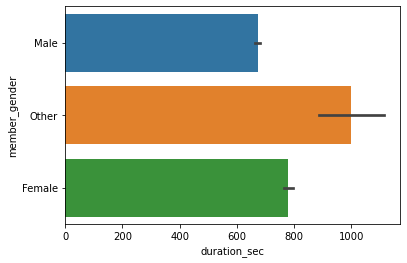

In [74]:
gender_v_duration = sb.barplot(data=bikes, x= "duration_sec", y = "member_gender")

Next I examine If users that spent long periods opted to share.

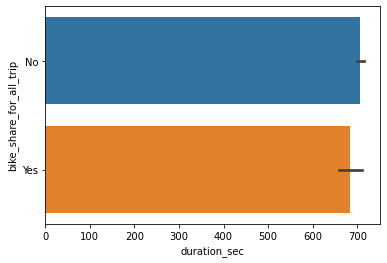

In [31]:
distance_v_sharing = sb.barplot(data=bikes, x= "duration_sec", y = "bike_share_for_all_trip")

Duration did not do much to influence bike sharing by the users. 

After that, I proceed to examine the relationship between the distance covered and the gender distribution

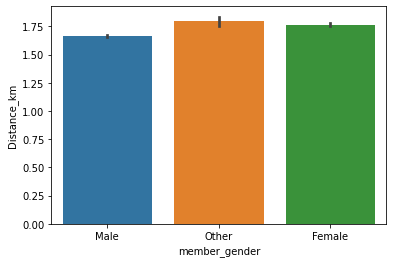

In [32]:
hx = sb.barplot(data=bikes, x= "member_gender", y = "Distance_km")

After that, I proceed to examine the relationship between the user type covered and the distance covered

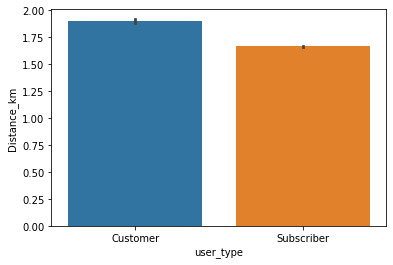

In [33]:
sx = sb.barplot(data=bikes, x= "user_type", y = "Distance_km")

The relationship here is quite close. The user type did not affect the distance covered by the users

Next, I explore the relationship between the user type and the duration.

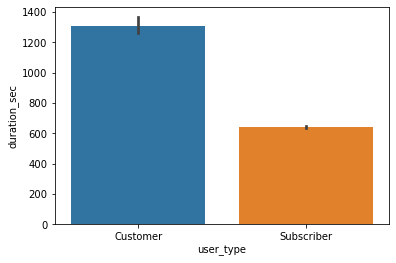

In [35]:
gx = sb.barplot(data=bikes, x= "user_type", y = "duration_sec")

A rather strange discovery here, customers tend to spend more time than subscribers with the bike.

Relationship between age and distance covered.

Text(0, 0.5, 'Distance (Km)')

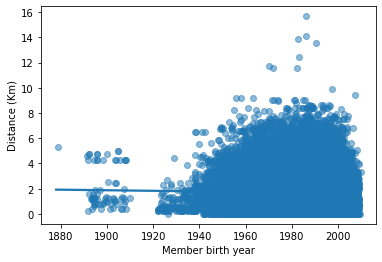

In [112]:
sb.regplot(data = bikes, x = 'member_birth_year', y = "Distance_km", x_jitter = 9, scatter_kws = {"alpha" : 1/2}); 
plt.xlabel("Member birth year")
plt.ylabel("Distance (Km)")

There is an unusual age distribution here. It is unlikely if not impossible to see individuals above 110 years riding commercial bikes in san fransisco.

plot matrix of 'birth year' and 'distance'  against some categorical variables.

<Figure size 648x720 with 0 Axes>

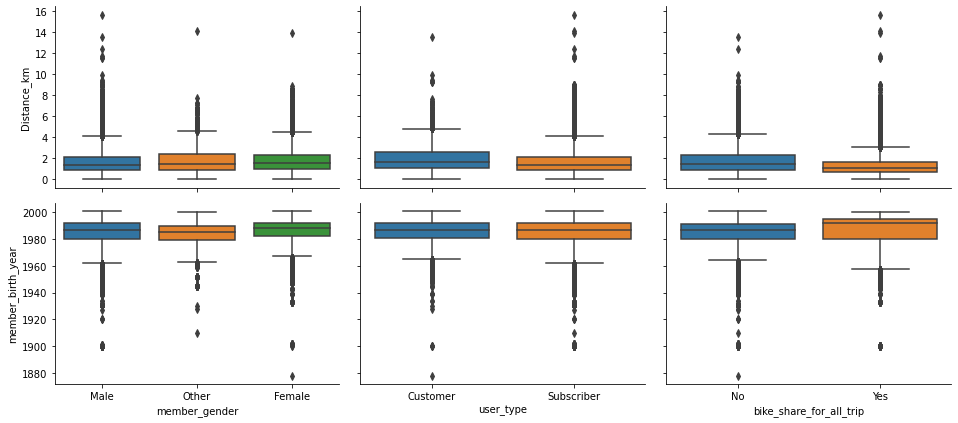

In [57]:
def boxgrid(x, y, **kwargs):
    
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y)

plt.figure(figsize = [9, 10])
g = sb.PairGrid(data = bikes, y_vars = ['Distance_km', 'member_birth_year'], x_vars = cat_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

It seems men covered more distance than anyother gender but the outliers in the ages gives an output that suggests women constituted the oldest age group. There are older customers than clients in total and on average.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?



Most predictions I had before investigation came out correct as they were quite obvious. An example is the reationship between birth year and duration. Surprisingly the Duration covered by the bikers did not affect their choice to share the bike or not.
The relationship between the user type and distance covered was interesting. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between the Birth year and Distance was an interesting distribution because some users of advanced age covered longer distances than a substantial number of younger users. 



## Multivariate Exploration

My goal here to to understand the relationship between user type, distance and bike sharing and gender, distance and usertype. 

In [71]:
bikes.head(1)

,Distance_km,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0.5447,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


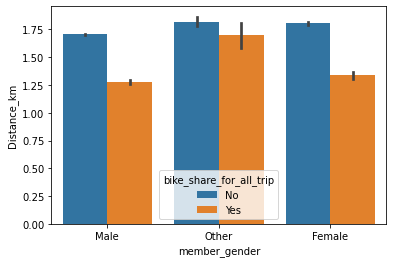

In [73]:
hx = sb.barplot(data=bikes, x= "member_gender", y = "Distance_km", hue = "bike_share_for_all_trip")

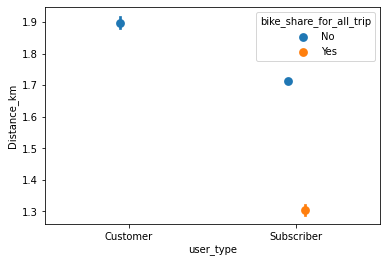

In [72]:
qx = sb.pointplot(data=bikes, x= "user_type", y = "Distance_km", hue = "bike_share_for_all_trip", dodge =0.1,
                 linestyles = " ")

The popular option not to share bikes was irrespective of Gender, user type or distance covered. Customers spend more time than subscribers and 'Other' users shared bikes more than female or male genders

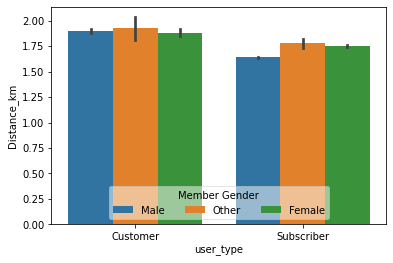

In [77]:
gen_user_assessment = sb.barplot(data=bikes, x= "user_type", y = "Distance_km", hue = "member_gender",)
gen_user_assessment.legend(loc = 8, ncol = 3, framealpha = 0.5, title = 'Member Gender')

The larger distance covered by the 'Other' gender was for both subscribers and customers alike. Male subscribers covered the least distance amongst all 3 genders which makes sense since the men generally spent the least time using the bikes. Surprisingly, the male customers covered more distance than than the female customers. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I introduced Gender to my inuiry about the usertype and how it affected usage and it further expanded the relationships. I used Distance as a flatliner to further understand the difference in usage after duration

### Were there any interesting or surprising interactions between features?

Male subscribers covered the least distance amongst all 3 genders which makes sense since the men generally spent the least time using the bikes but, surprisingly, the male customers covered more distance than than the female customers.